# 7. CNN (Convolutional neural network)
- CNN은 이미지 인식과 음성 인식 등 다양한 곳에서 사용된다.


## 1. 전체 구조
- CNN은 앞장에서 배웠던 NN과 같이 레고 블럭처럼 계층을 조합하여 만들 수 있다.
  - Conv layer와 Pooling layer가 새롭게 추가된다.
- 이전의 NN은 인접한 계층의 모든 뉴런과 결합되어있다. 이를 완전 연결(fully-connected, 전결합)이라고도 부르며, 완전히 연결된 계층을 Affine 계층으로 구현했었다.


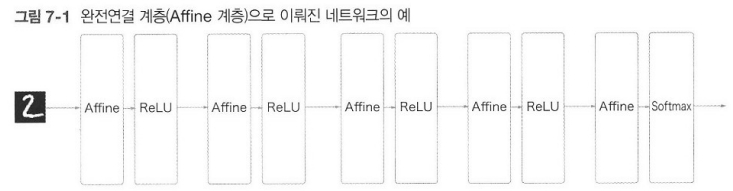

- Affine 계층과 ReLU 계층을 거쳐서 마지막에는 Softmax함수를 사용해서 결과값을 얻었다.

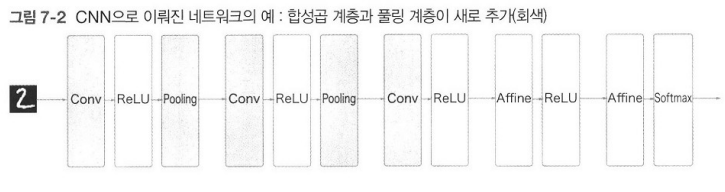

- CNN에서는 Conv과 Pooling layer가 추가되었다.
  - CNN의 계층은 Conv - ReLU - (Pooling) 의 흐름으로 연결된다. 풀링이 생략되는 경우도 존재한다.
- 기존의 Affine - ReLU을 그대로 사용할 수 있고 마지막에는 Softmax함수를 활용하여 결과값을 얻을 수도 있다.

## 2. 합성곱 계층
- CNN에서는 Padding과 stride 등의 용어들이 등장.
- 계층 사이에는 3차원 데이터와 같이 입체적인 데이터가 흐른다는 점에서 기존의 신경망과 차이가 있다.

- 완전 연결 계층의 문제점
  - 데이터의 형상이 무시된다.
  - 입력 데이터가 이미지인 경우, 가로, 세로, 채널로 구성된 3차원 정보이다.
  - 완전 연결 계층에 입력할 때에는 3차원 데이터를 1차원 데이터로 플랫하게 해주어야한다.
  - 지금까지는 MNIST 데이터셋이 (1, 28, 28)인 이미지를 784개의 데이터로 1렬로 만들어서 입력으로 넣어주었다.
  - 3차원 이미지 데이터는 인접한 픽셀의 위치 정보 등 3차원 속에서 의미를 가지고 있는 패턴이 존재한다.
  

- Conv layer는 형상을 유지한다.
  - 데이터를 3차원으로 입력받아서 마찬가지로 다음 계층으로 3차원 데이터로 전달.
  - 데이터를 제대로 이해할 가능성이 생긴다.
- Conv layer의 입출력 데이터를 feature map이라고 부른다. 입력을 입력 특징 맵, 출력을 출력 특징 맵이라고 부른다.

### 합성곱 연산
  - 이미지 처리에서 말하는 필터 연산에 해당되는 부분
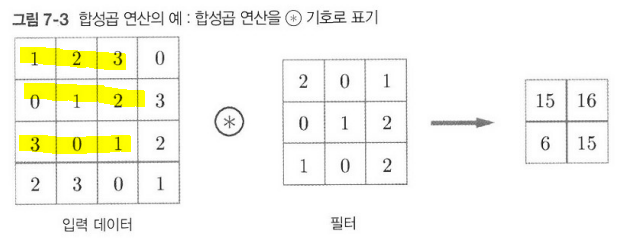

- 왼쪽 항을 입력 data, 합성곱으로 곱해지는 항을 필터라고 부른다. (커널이라고도 부른다.)
- 합성곱 연산은 윈도우를 일정 간격으로 이동하며 입력 data를 적용한다.
- input과 filter에서 대응하는 원소끼리 곱한 후 그 총합을 구한다.
- ex) 노란색으로 칠해진 항 (1 $*$ 2 + 2 $*$ 0 + ....+ 1$*$2 = 15)
- 완전연결 신경망에서는 가중치 매개변수와 편향이 존재, CNN에서는 필터의 매개변수가 가중치에 해당.
- 편항까지 더하면<br>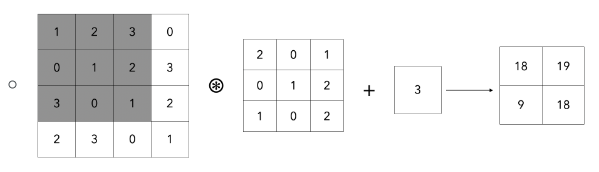

  - 편향은 항상 하나의 값 (1X1)만 존재한다.

### 패딩
- 합성곱 연산을 수행하기 이전에 데이터 주변을 특정 값으로 채워주기도 한다. 이를 패딩(padding)이라고 부른다.
  - ex) 4X4 크기의 input data를 폭 1짜리 패딩 적용하게 되면 가작 바깥에 특정 값을 채워서 5X5의 입력 데이터를 만들 수 있다.
- 패딩은 주로 출력 크기를 조정할 목적으로 사용한다.
  - ex) input data : 4X4<br>filter : 3X3<br> output data : 2X2
  - 패딩 적용 시 4X4로 크기가 유지된다.
    - 연산을 수행하면 할 수록 크기가 줄어들 수 있기 때문에 패딩을 적절히 사용하여 input data의 공간적 크기를 고정하고 다음 계층에 데이터를 전달할 수있다.


### 스트라이드 (stride)
- 필터를 적용하는 위치의 간격을 stride 라고 한다.
- 위의 예제들에서는 필터를 1칸씩 이동하여 연산을 수행하였다
  - stride = 1
- stride = 2, 윈도우가 2칸씩 움직인다.
> stride 값을 늘리면 출력의 크기가 줄어들고, 패등의 값을 늘리면 출력의 크기가 늘어난다.

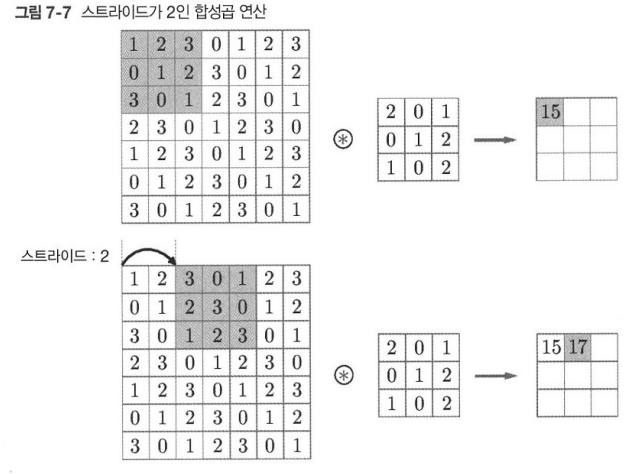

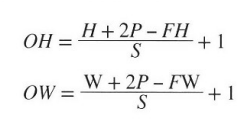

- input : (H, W)
- Filter : (FH, FW)
- output : (OH, OW)
- padding  : P
- stride : S
  > 위 나눗셈은 정수로 나누어 떨어져야한다.


### 3차원 데이터의 합성곱 연산
- 3차원 형상의 합성곱 연산에 대하여 알아본다.
- 3차원 데이터는 input , filter 합성곱 연산을 채널마다 수행하고 그 결과를 더하여 하나의 출력으로 얻을 수 있다.


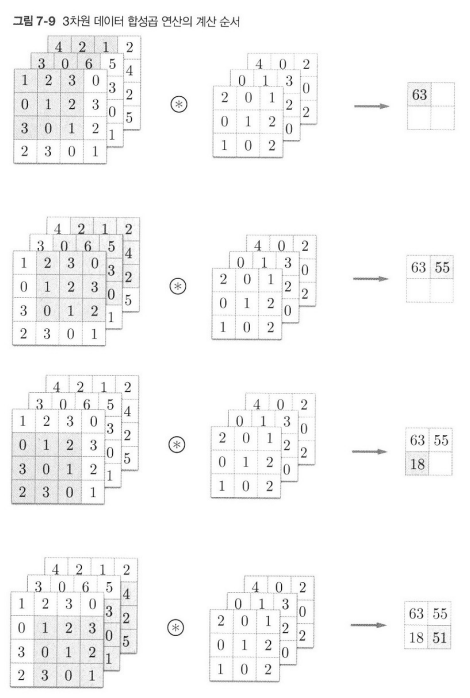

- 3차원 연산에서는 input data의 채널 수와 filter의 채널 수가 같아야 한다.
  - filter 크기 자체는 원하는 값으로 설정할 수 있다. (단, 모든 채널 필터의 크기가 같아야 한다.)


### 블록으로 생각하기
- 3차원의 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉽다.
- 3차원 데이터는 (채널, 높이, 너비) 순서로 써본다.<br>
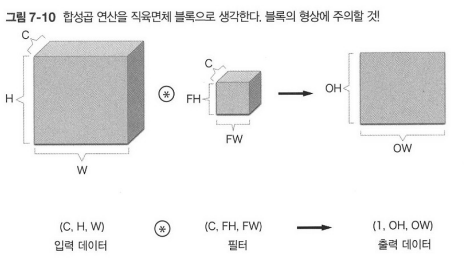

output data가 한장의 맵이 된다.
- 다수의 채널을 내보내려면 어떻게 해야 하는가?
  - 필터(가중치)를 다수 사용한다.

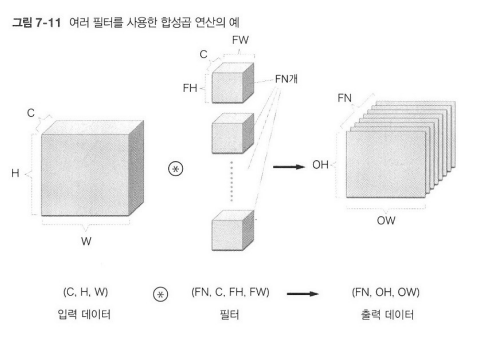

- 필터 FN개를 적용하면 출력 맵도 FN개가 생성된다.
- 그에 맞춰 편향의 개수도 FN개 만큼 늘려주어야 한다.
- 형상이 다른 블록의 덧셈은 넘파이의 브로드캐스트 기능으로 쉽게 구현할 수 있다.


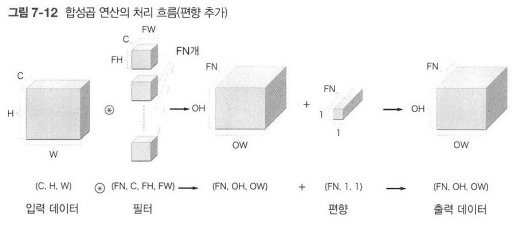

### 배치 처리
- 각 계층을 흐르는 데이터의 차원을 하나 늘려서 4차원 데이터로 저장한다.
  - 데이터를 (데이터 수, 채널 수, 높이, 너비) 순서로 저장
- 데이터 N개에 대하여
  - N 개의 데이터 (N, C, H, W) ⊛
 필터 (FN, C, FH, FW) -> <br>
 N개의 데이터 (N, FN, OH, OW) + 편향 (FN, 1, 1) -> <br>
 N개의 출력 데이터 (N, FN, OH, OW)

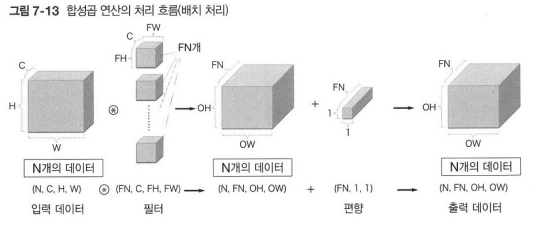

## 3. 풀링 계층 (Pooling layer)
- 풀링은 세로,가로 방향의 공간을 줄이는 연산<br>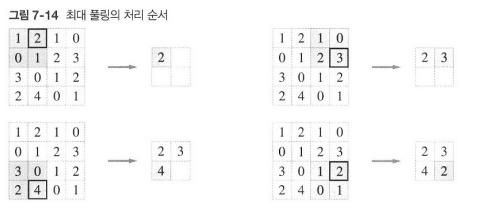


- 2X2 Max pooling을 stride = 2로 처리하는 순서이다.
- 2X2 영역에서 가장 큰 값을 꺼내오는 작업을 수행한다.
- 윈도우 크기와 스트라이드는 같은 값으로 설정한다.
  - ex) 윈도우 : 4X4, stride는 4
- average pooling도 존재하지만 이미지 인식 분야에서는 주로 Max pooling 을 사용한다.

### 풀링계층의 특징
- 학습해야 할 매개변수가 없다.
  - 풀링은 대상인 영역에서 최댓값, 평균을 명확한 처리
- 채널 수가 변하지 않는다.(독립적으로 계산)<br>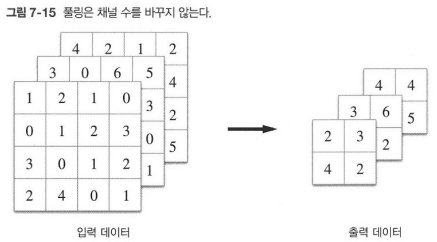
  - 입력 데이터의 채널 수 그대로 출력 데이터로 내보낸다.
- 입력의 변화에 영향을 적게 받는다. (강건하다)<br>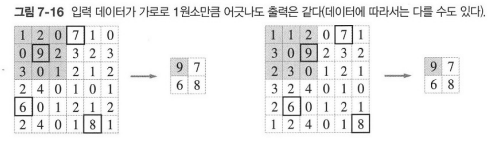
  - 입력데이터가 조금 변하더라도 풀링의 결과는 거의 변하지 않는다.

## 4.합성곱/풀링 계층 구현하기
- CNN 계층 사이를 흐르는 데이터는 4차원이다
  - (10, 1, 28, 28) = 데이터10개, 채널1개, 높이 28, 너비 28

- im2col 이라는 편의 함수를 사용하여 합성곱 연산을 수행한다.
  - 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는 함수<br>
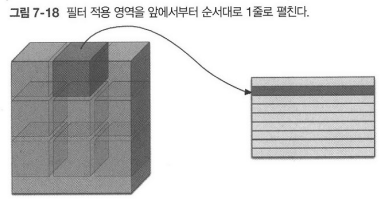

- 필터 영역이 겹치게 된다면 im2col로 전개한 후, 원소의 수가 원래 블록의 수보다 많아지게된다.
  - 메모리를 더 소비하는 단점 존재
- im2col로 입력데이터를 전개한 후, Conv layer의 filter를 1열로 전개하고 이 두 행렬의 곱을 계산한다.
- 계산이 끝난 후 다시 4차원 데이터로 변형한다.

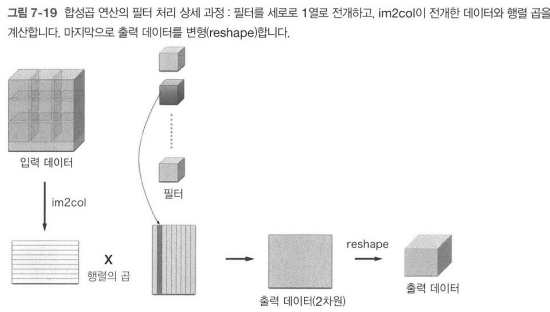

### 합성곱 계층 구현하기
 - 책에서 구현한 im2col 함수의 인터페이스는 다음과 같다.
```python
im2col(input_data, filter_h, filter_w, stride=1, pad=0)
```
- input_data = (데이터수, 채널수, 높이, 너비) 4차원 배열로 이뤄진 data
- filter_h = 필터의 높이
- filter_w = 필터의 너비
- stride = 스트라이드
- pad = 패딩

In [5]:
import numpy as np
import sys, os
sys.path.append(os.pardir)

from content.common.util import im2col

x1 = np.random.rand(1, 3, 7, 7) #배치크기 1(데이터1개), 채널3, 높이너비 7X7
col1 = im2col(x1, 5, 5, stride = 1, pad = 0)
print(col1.shape) # (9, 75)

(9, 75)


In [6]:
from content.common.util import col2im

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

        # 중간 데이터（backward 시 사용）
        self.x = None
        self.col = None
        self.col_W = None

        # 가중치와 편향 매개변수의 기울기
        self.dW = None
        self.db = None

    def forward(self, x): #순전파
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad) #입력 데이터 전개
        col_W = self.W.reshape(FN, -1).T    #필터 전개
        out = np.dot(col, col_W) + self.b   # 두 행렬 곱

        #출력 데이터를 적절한 형상으로 바꿔준다. numpy의 transpose 사용
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        #인덱스 번호로 축의 순서를 변경한다.

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout): #역전파
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

- reshape에 -1을 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어준다.
  - 다차원 배열 W = (10, 3, 5 ,5) / 원소수는 750개
  - reshape(10, -1) 호출 시 750개의 원소를 10묶음으로 묶어준다 <br>
  = 형상 (10, 75) 배열로 만들어준다

- 순전파에서 사용하는 im2col
```python
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).
    
    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col
```

- 역전파에서 사용하는 col2im
```python
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """(im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환한다.
    
    Parameters
    ----------
    col : 2차원 배열(입력 데이터)
    input_shape : 원래 이미지 데이터의 형상（예：(10, 1, 28, 28)）
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    img : 변환된 이미지들
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]
```

- 역전파에서 사용하는 col2im의 코드는 위와 같다.   
  - (im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환한다.
- 순전파에서의 im2col
  - 다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).
    

### 풀링 계층 구현하기
- 합성곱 계층과 마찬가지로 im2col을 사용해서 입력데이터를 전개.
  - 차이점은 풀링 적용 영역을 채널마다 독립적으로 전개한다는 것<br>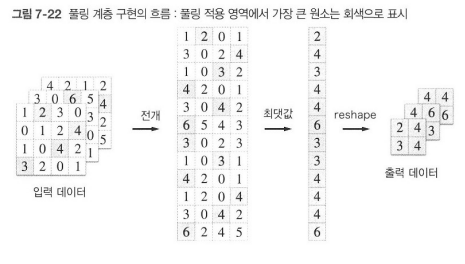

채널별로 전개한 후 해당 행에서 최댓값, 혹은 평균값만 골라낸다.

In [7]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        #1. 전개
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)

        #2. 최댓값
        out = np.max(col, axis=1) #axis=1 행방향

        #3. 성형
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)


        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)

        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,))

        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

        return dx

-  풀링 계층의 구현은 세 단계로 진행
  - 1. 입력 데이터를 전개한다
  - 2. 행별 최댓값을 구한다.
  - 3. 적절한 모양으로 성형한다.

## 5. CNN구현하기
- 합성곱 계층과 풀링 계층을 조합해서 손글씨 숫자를 인식하는 CNN을 조립해본다.
- CNN 은 간단하게
  -  Convolution-ReLU-Pooling-Affine-ReLU-Affine-Softmax 순으로 흐르도록 작성해본다.

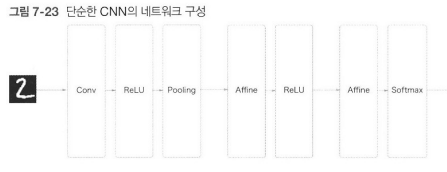

In [8]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from content.common.layers import *
from content.common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    # 초기화 인수로 주어진 합성곱 계층의 하이퍼 파라미터를 딕서녀리에서 꺼낸다.
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        #1번째 층의 Conv 계층의 가중치
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        #1번째 층의 Conv 계층의 편향
        self.params['b1'] = np.zeros(filter_num)
        #2번째 층의 Affine 계층의 가중치
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        #2번째 층의 Affine 계층의 편향
        self.params['b2'] = np.zeros(hidden_size)
        #3번째 층의 Affine 계층의 가중치
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        #3번째 층의 Affine 계층의 편향
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads #각 가중치 매개변수의 기울기 저장

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

 - SimpleConvNet으로 MNIST 데이터셋을 학습해본다

train loss:2.3002975073688456
=== epoch:1, train acc:0.117, test acc:0.117 ===
train loss:2.298693408256276
train loss:2.2944112800241196
train loss:2.2898333921489766
train loss:2.2794905411482027
train loss:2.2712333109597473
train loss:2.2557732350086646
train loss:2.2455238415253844
train loss:2.241717672502625
train loss:2.210845711049269
train loss:2.1775247270931835
train loss:2.151644812541668
train loss:2.1341597021331147
train loss:2.047570993089232
train loss:1.9887960609962498
train loss:1.9598744079547574
train loss:1.9142339365878762
train loss:1.857197386159315
train loss:1.7115739102686554
train loss:1.5138819244812551
train loss:1.5628462058978163
train loss:1.5965664938976998
train loss:1.4800244797342919
train loss:1.2857317316493502
train loss:1.2086557496085713
train loss:1.1583489563560883
train loss:1.0511352922225354
train loss:1.0240094038237804
train loss:0.9785791500323106
train loss:0.9401109811223748
train loss:0.8420315114107225
train loss:0.89874453517125

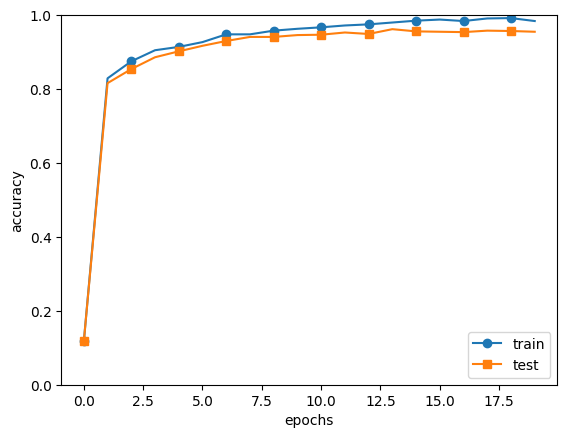

In [10]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from content.dataset.mnist import load_mnist
from content.common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 6. CNN시각화하기
-

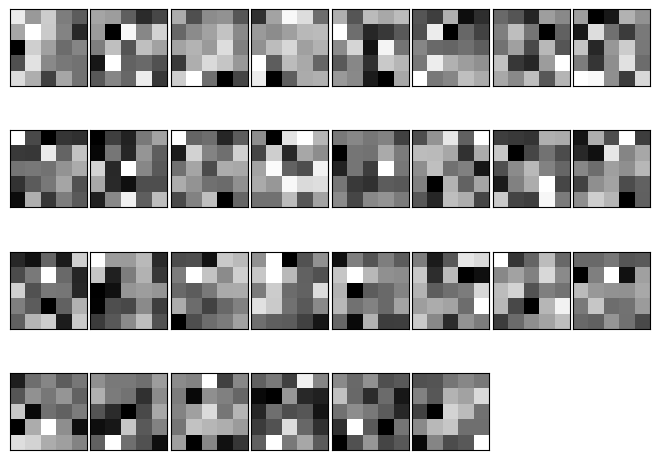

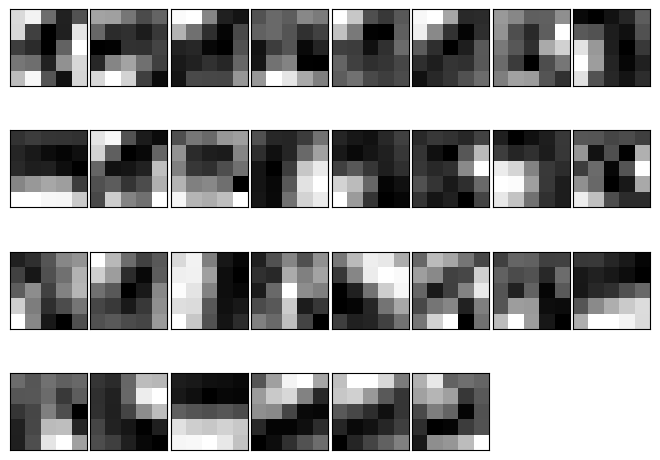

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

- 학습 전 필터는 무작위로 초기화되고 규칙성이 잘 보이지 않는다.
- 학습을 마친 필터는 약간의 규칙성을 가지는 이미지가 된다.
  - 가로 엣지에 반응, 세로 엣지에 반응 하는 필터 등이 생성
- 합성곱 계층의 필터는 엣지나 블롭(덩어리)등 원시적인 정보에 반응하는 필터가 된다. 이 정보가 뒷단의 계층에 전달된다.

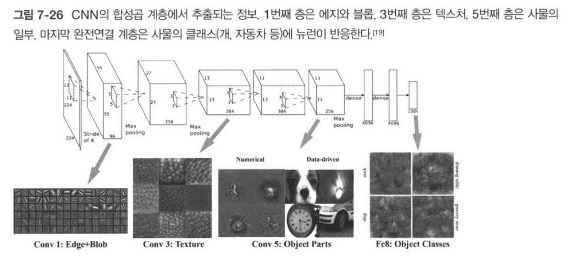

- 층 깊이에 따라서 추출정보는 변화한다.
- 1번째 층의 필터에서는 원시적인 엣지, 블롭 등의 저수준의 정보가 추출됨.
- 고수준으로 갈 수록 각 계층에 추출되는 정보가 더 추상화된 이미지에 반응하는 것을 확인해볼 수 있다.

## 7. 대표적인 CNN
- LeNet<br>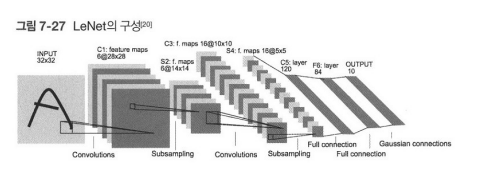
  - 손글씨를 인식하는 네트워크
  - 합성곱 계층과 풀링 계층을 반복, 마지막에 완전 연결 계층을 거치며 결과를 출력한다.
  - 활성화 계층으로 sigmoid 사용
- AlexNet<br>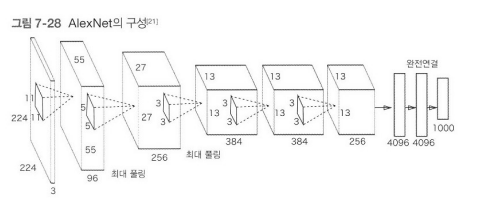
  - 12년도에 발표된 NN
  - 합성곱 계층과 풀링 계층을 거듭하며 마지막에 완전연결계층을 거쳐 결과를 출력한다.
  - 활성화 함수로 ReLU 계층 사용
  - LRN이라는 국소적 정규화를 실시하는 계층 사용한다.
  - 드롭아웃 이용

## 8. 정리

- CNN은 지금까지의 완전연결 계층 네트워크에 Convolutional layer와 Pooling layer를 새로 추가한다.
-  Convolutional layer와 Pooling layerdms im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
- CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.
- 대표적인 CNN에는 LeNet과 AlexNet이 있다.
- 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여했다.